In [ ]:
from keras.datasets.cifar10 import load_data
import matplotlib.pyplot as plt

(x_train,y_train),(x_test,y_test) = load_data()

170498071/170498071 [==============================] - 2s 0us/step


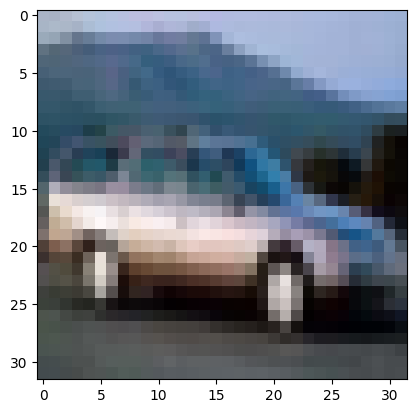

In [ ]:
plt.imshow(x_train[4])

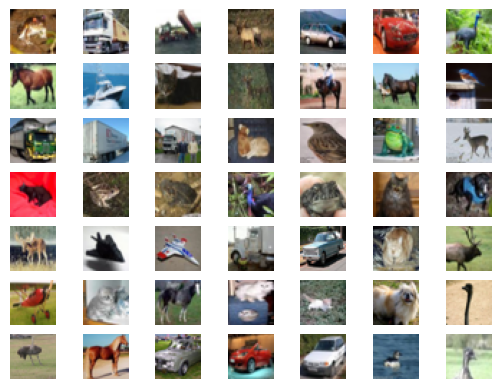

In [ ]:
for i in range(49):

  plt.subplot(7,7,1+i)

  plt.axis('off')

  plt.imshow(x_train[i])

plt.show()

In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Flatten,LeakyReLU,Dropout
from keras.optimizers import Adam
import numpy as np
from keras.utils.vis_utils import plot_model

In [ ]:

def descriminator(in_shape = (32,32,3)):

  model = Sequential()

  model.add(Conv2D(64,(3,3),padding= "same" , input_shape = in_shape))
  model.add(LeakyReLU(alpha=0.2))

  model.add(Conv2D(128,(3,3),padding= "same" , strides=(2,2)))
  model.add(LeakyReLU(alpha=0.2))

  model.add(Conv2D(128,(3,3),padding= "same" , strides=(2,2)))
  model.add(LeakyReLU(alpha=0.2))

  model.add(Conv2D(256,(3,3),padding= "same" , strides=(2,2)))
  model.add(LeakyReLU(alpha=0.2))

  model.add(Flatten())
  model.add(Dropout(0.4))
  model.add(Dense(1,activation='sigmoid'))

  opt = Adam(lr=0.0002,beta_1=0.5)

  model.compile(optimizer = opt, loss = 'binary_crossentropy',metrics = ['accuracy'])

  return model

In [ ]:
model = descriminator()

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 16, 16, 128)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         147584    
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 8, 8, 128)         0         
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 256)         2

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
def load_real_sample():

  (x_train,_),(_,_) = load_data()

  x = x_train.astype('float32')

  x = (x-127.5)/127.5

  return x

In [ ]:
x = load_real_sample()
x.shape

(50000, 32, 32, 3)

In [ ]:
def generate_real_sample(dataset,n_sample):

  ix = np.random.randint(0,dataset.shape[0],n_sample)

  x = dataset[ix]
  y = np.ones((n_sample,1))

  return x,y

In [ ]:
def generate_fake_sample(n_sample):

  x = np.random.rand(32 * 32 * 3 * n_sample)
  x = -1 + x * 2
  x = x.reshape((n_sample,32,32,3))

  y = np.zeros((n_sample,1))

  return x,y

In [ ]:
x,y = generate_fake_sample(64)

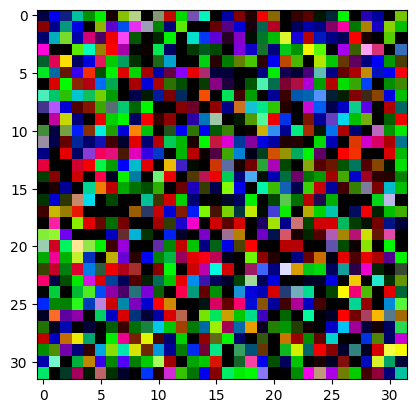

In [ ]:
plt.imshow(x[0])

In [ ]:
def train_descriminator(model,dataset,n_iter=20,n_batch=128):

  half_batch = n_batch//2

  for i in range(n_iter):

    x_real,y_real = generate_real_sample(dataset,half_batch)

    _,real_acc = model.train_on_batch(x_real,y_real)

    x_fake,y_fake = generate_fake_sample(half_batch)

    _,fake_acc = model.train_on_batch(x_fake,y_fake)

    print(f'{i+1} . real = {real_acc * 100}% , fake = {fake_acc * 100}% ')

In [ ]:
model = descriminator()

dataset = load_real_sample()

train_descriminator(model,dataset)

1 . real = 67.1875% , fake = 0.0% 
2 . real = 100.0% , fake = 0.0% 
3 . real = 100.0% , fake = 4.6875% 
4 . real = 100.0% , fake = 26.5625% 
5 . real = 98.4375% , fake = 84.375% 
6 . real = 98.4375% , fake = 96.875% 
7 . real = 98.4375% , fake = 100.0% 
8 . real = 95.3125% , fake = 100.0% 
9 . real = 98.4375% , fake = 100.0% 
10 . real = 98.4375% , fake = 100.0% 
11 . real = 100.0% , fake = 100.0% 
12 . real = 98.4375% , fake = 100.0% 
13 . real = 100.0% , fake = 100.0% 
14 . real = 98.4375% , fake = 100.0% 
15 . real = 96.875% , fake = 100.0% 
16 . real = 96.875% , fake = 100.0% 
17 . real = 100.0% , fake = 100.0% 
18 . real = 100.0% , fake = 100.0% 
19 . real = 100.0% , fake = 100.0% 
20 . real = 100.0% , fake = 100.0% 


In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Reshape,Conv2D,Conv2DTranspose,LeakyReLU

In [ ]:
def generator(latent_dim):

  model = Sequential()

  n_nodes = 256 * 4 * 4

  model.add(Dense(n_nodes,input_dim = latent_dim))
  model.add(LeakyReLU(alpha = 0.2))
  model.add(Reshape((4,4,256)))

  model.add(Conv2DTranspose(128,(4,4),strides=(2,2),padding = 'same'))
  model.add(LeakyReLU(alpha=0.2))

  model.add(Conv2DTranspose(128,(4,4),strides=(2,2),padding = 'same'))
  model.add(LeakyReLU(alpha=0.2))

  model.add(Conv2DTranspose(128,(4,4),strides=(2,2),padding = 'same'))
  model.add(LeakyReLU(alpha=0.2))

  model.add(Conv2D(3,(3,3),activation='tanh',padding='same'))

  return model

In [ ]:
model1 = generator(100)

model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 4096)              413696    
                                                                 
 leaky_re_lu_8 (LeakyReLU)   (None, 4096)              0         
                                                                 
 reshape (Reshape)           (None, 4, 4, 256)         0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 8, 8, 128)        524416    
 nspose)                                                         
                                                                 
 leaky_re_lu_9 (LeakyReLU)   (None, 8, 8, 128)         0         
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 16, 16, 128)      262272    
 ranspose)                                            

In [ ]:
def generate_latent_points(latent_dim,n_sample):

  x_input = np.random.randn(latent_dim * n_sample)
  x_input = x_input.reshape(n_sample,latent_dim)

  return x_input

In [ ]:
def generate_fake_sample_by_generator(g_model,latent_dim,n_sample):

  x_input = generate_latent_points(latent_dim,n_sample)

  x = g_model.predict(x_input)

  y = np.zeros((n_sample,1))

  return x,y

2/2 [==============================] - 0s 100ms/step


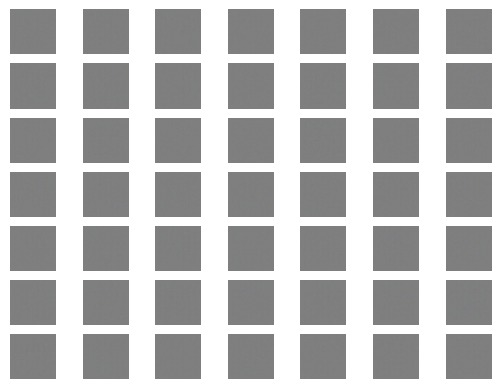

In [ ]:
model = generator(100)

x,y = generate_fake_sample_by_generator(model,100,49)

x = (x+1)/2.0

for i in range(49):

  plt.subplot(7,7,1+i)

  plt.axis('off')

  plt.imshow(x[i])

plt.show()

In [ ]:
def gan(g_model,d_model):

  d_model.trainable = False

  model = Sequential()

  model.add(g_model)

  model.add(d_model)

  opt = Adam(lr = 0.0002,beta_1 = 0.5)

  model.compile(optimizer = opt,loss = 'binary_crossentropy')

  return model

In [ ]:
d_model = descriminator()

g_model = generator(100)

model = gan(g_model,d_model)

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_5 (Sequential)   (None, 32, 32, 3)         1466115   
                                                                 
 sequential_4 (Sequential)   (None, 1)                 522497    
                                                                 
Total params: 1,988,612
Trainable params: 1,466,115
Non-trainable params: 522,497
_________________________________________________________________


In [ ]:
def train(g_model,d_model,gan_model,dataset,latent_dim,n_epochs=20,n_batch=128):

  batch_per_epoch = dataset.shape[0]//n_batch
  half_batch = n_batch//2

  for i in range(n_epochs):
    for j in range(batch_per_epoch):

      x_real,y_real = generate_real_sample(dataset,half_batch)

      d_loss1,_ = d_model.train_on_batch(x_real,y_real)

      x_fake,y_fake = generate_fake_sample_by_generator(g_model,latent_dim,half_batch)

      d_loss2,_ = d_model.train_on_batch(x_fake,y_fake)

      x_gan = generate_latent_points(latent_dim,n_batch)

      y_gan = np.ones((n_batch,1))

      g_loss = gan_model.train_on_batch(x_gan,y_gan)

      print(f'{i+1}. {j+1}/{batch_per_epoch} : d1 = {d_loss1} , d2 = {d_loss2} , g = {g_loss}')

    if (i+1)%10 == 0:
      summerize_function(i,g_model,d_model,dataset,latent_dim)


In [ ]:
def summerize_function(i,g_model,d_model,dataset,latent_dim,n_samples = 150):

  x_real,y_real = generate_real_sample(dataset,n_samples)

  _,acc_real = d_model.evaluate(x_real,y_real)

  x_fake,y_fake = generate_fake_sample_by_generator(g_model,latent_dim,n_samples)

  _,acc_fake = d_model.evaluate(x_fake,y_fake)

  print(f'Descriminator Accuracy: Real = {acc_real} , Fake = {acc_fake}')

  save_plot(x_fake,i)

  filename = 'generator_model_%03d.h5' % (i+1)
  g_model.save(filename)

In [ ]:
def save_plot(example,epoch,n=7):

  example = (example + 1)/2.0

  for i in range(n * n):
    plt.subplot(n,n,i+1)

    plt.axis('off')

    plt.imshow(example[i])

  filename = 'generated_plot_e%03d.png' % (epoch+1)

  plt.savefig(filename)
  plt.close()

In [ ]:
d_model = descriminator()

g_model = generator(100)

gan_model = gan(g_model,d_model)



In [ ]:
train(g_model,d_model,gan_model,dataset,latent_dim=100,n_epochs=200,n_batch=128)

Streaming output truncated to the last 5000 lines.
2/2 [==============================] - 0s 11ms/step
4. 233/390 : d1 = 0.6826139688491821 , d2 = 0.6115009784698486 , g = 0.8377335071563721
2/2 [==============================] - 0s 11ms/step
4. 234/390 : d1 = 0.6817494034767151 , d2 = 0.6470701694488525 , g = 0.8365360498428345
2/2 [==============================] - 0s 3ms/step
4. 235/390 : d1 = 0.6523435711860657 , d2 = 0.682931125164032 , g = 0.8345210552215576
2/2 [==============================] - 0s 7ms/step
4. 236/390 : d1 = 0.6838144063949585 , d2 = 0.6542782187461853 , g = 0.8958649039268494
2/2 [==============================] - 0s 5ms/step
4. 237/390 : d1 = 0.6734042167663574 , d2 = 0.6100035905838013 , g = 0.8303006887435913
2/2 [==============================] - 0s 5ms/step
4. 238/390 : d1 = 0.7120378017425537 , d2 = 0.5973390340805054 , g = 0.8600625991821289
2/2 [==============================] - 0s 6ms/step
4. 239/390 : d1 = 0.7032184600830078 , d2 = 0.6578938364982605 

Streaming output truncated to the last 5000 lines.
2/2 [==============================] - 0s 19ms/step
14. 233/390 : d1 = 0.7058342099189758 , d2 = 0.6646261215209961 , g = 0.8514800071716309
2/2 [==============================] - 0s 4ms/step
14. 234/390 : d1 = 0.690355122089386 , d2 = 0.6269153356552124 , g = 0.8457223176956177
2/2 [==============================] - 0s 6ms/step
14. 235/390 : d1 = 0.7328776717185974 , d2 = 0.6790626049041748 , g = 0.857674241065979
2/2 [==============================] - 0s 12ms/step
14. 236/390 : d1 = 0.655387282371521 , d2 = 0.6203470826148987 , g = 0.8600572347640991
2/2 [==============================] - 0s 5ms/step
14. 237/390 : d1 = 0.7059895992279053 , d2 = 0.6313798427581787 , g = 0.869831383228302
2/2 [==============================] - 0s 4ms/step
14. 238/390 : d1 = 0.6636512279510498 , d2 = 0.6126712560653687 , g = 0.8935890793800354
2/2 [==============================] - 0s 5ms/step
14. 239/390 : d1 = 0.6692789196968079 , d2 = 0.6464551687240

Streaming output truncated to the last 5000 lines.
2/2 [==============================] - 0s 5ms/step
24. 233/390 : d1 = 0.6752384305000305 , d2 = 0.6584893465042114 , g = 0.8743469715118408
2/2 [==============================] - 0s 4ms/step
24. 234/390 : d1 = 0.6785910129547119 , d2 = 0.637840986251831 , g = 0.8808192610740662
2/2 [==============================] - 0s 6ms/step
24. 235/390 : d1 = 0.740843653678894 , d2 = 0.6863297820091248 , g = 0.8686614632606506
2/2 [==============================] - 0s 13ms/step
24. 236/390 : d1 = 0.7037252187728882 , d2 = 0.6383107304573059 , g = 0.8913885354995728
2/2 [==============================] - 0s 7ms/step
24. 237/390 : d1 = 0.7020554542541504 , d2 = 0.6233491897583008 , g = 0.888486921787262
2/2 [==============================] - 0s 5ms/step
24. 238/390 : d1 = 0.6545283198356628 , d2 = 0.6360269784927368 , g = 0.8292763829231262
2/2 [==============================] - 0s 5ms/step
24. 239/390 : d1 = 0.7001419067382812 , d2 = 0.6482157707214

Streaming output truncated to the last 5000 lines.
2/2 [==============================] - 0s 5ms/step
34. 233/390 : d1 = 0.7398989200592041 , d2 = 0.5955650806427002 , g = 0.908951997756958
2/2 [==============================] - 0s 6ms/step
34. 234/390 : d1 = 0.7303950786590576 , d2 = 0.6558330059051514 , g = 0.8680415153503418
2/2 [==============================] - 0s 11ms/step
34. 235/390 : d1 = 0.6888898611068726 , d2 = 0.6178395748138428 , g = 0.8914724588394165
2/2 [==============================] - 0s 7ms/step
34. 236/390 : d1 = 0.6638232469558716 , d2 = 0.5728061199188232 , g = 0.8784279823303223
2/2 [==============================] - 0s 11ms/step
34. 237/390 : d1 = 0.6430083513259888 , d2 = 0.6541439294815063 , g = 0.8158915042877197
2/2 [==============================] - 0s 11ms/step
34. 238/390 : d1 = 0.6431034803390503 , d2 = 0.6330553293228149 , g = 0.8655696511268616
2/2 [==============================] - 0s 9ms/step
34. 239/390 : d1 = 0.6120314598083496 , d2 = 0.674322605

Streaming output truncated to the last 5000 lines.
2/2 [==============================] - 0s 4ms/step
44. 233/390 : d1 = 0.6520202159881592 , d2 = 0.6442254781723022 , g = 0.8225772976875305
2/2 [==============================] - 0s 19ms/step
44. 234/390 : d1 = 0.657194197177887 , d2 = 0.6927449703216553 , g = 0.8207509517669678
2/2 [==============================] - 0s 8ms/step
44. 235/390 : d1 = 0.6247744560241699 , d2 = 0.6163325905799866 , g = 0.8660480976104736
2/2 [==============================] - 0s 4ms/step
44. 236/390 : d1 = 0.6672621369361877 , d2 = 0.688269853591919 , g = 0.8614797592163086
2/2 [==============================] - 0s 8ms/step
44. 237/390 : d1 = 0.6491541862487793 , d2 = 0.6093000769615173 , g = 0.8211670517921448
2/2 [==============================] - 0s 5ms/step
44. 238/390 : d1 = 0.6444543600082397 , d2 = 0.6600340604782104 , g = 0.8958100080490112
2/2 [==============================] - 0s 13ms/step
44. 239/390 : d1 = 0.6256629824638367 , d2 = 0.66989272832

Streaming output truncated to the last 5000 lines.
2/2 [==============================] - 0s 6ms/step
54. 233/390 : d1 = 0.6591634750366211 , d2 = 0.6302905082702637 , g = 0.8900306224822998
2/2 [==============================] - 0s 7ms/step
54. 234/390 : d1 = 0.6348526477813721 , d2 = 0.6470012068748474 , g = 0.9436035752296448
2/2 [==============================] - 0s 12ms/step
54. 235/390 : d1 = 0.5943741798400879 , d2 = 0.6233844757080078 , g = 0.9123170971870422
2/2 [==============================] - 0s 7ms/step
54. 236/390 : d1 = 0.706268846988678 , d2 = 0.6538829803466797 , g = 0.879841685295105
2/2 [==============================] - 0s 4ms/step
54. 237/390 : d1 = 0.586369514465332 , d2 = 0.6296302080154419 , g = 0.9430102109909058
2/2 [==============================] - 0s 4ms/step
54. 238/390 : d1 = 0.6788133382797241 , d2 = 0.5896673798561096 , g = 0.8631108999252319
2/2 [==============================] - 0s 6ms/step
54. 239/390 : d1 = 0.6707061529159546 , d2 = 0.6591868400573

Streaming output truncated to the last 5000 lines.
2/2 [==============================] - 0s 5ms/step
64. 233/390 : d1 = 0.6827448606491089 , d2 = 0.6540049910545349 , g = 0.9063001871109009
2/2 [==============================] - 0s 5ms/step
64. 234/390 : d1 = 0.5817145109176636 , d2 = 0.6508219242095947 , g = 0.9578671455383301
2/2 [==============================] - 0s 9ms/step
64. 235/390 : d1 = 0.6432455778121948 , d2 = 0.5585852265357971 , g = 0.9380770921707153
2/2 [==============================] - 0s 9ms/step
64. 236/390 : d1 = 0.6929233074188232 , d2 = 0.6302659511566162 , g = 0.8917087912559509
2/2 [==============================] - 0s 6ms/step
64. 237/390 : d1 = 0.6364128589630127 , d2 = 0.6287963390350342 , g = 0.889334499835968
2/2 [==============================] - 0s 5ms/step
64. 238/390 : d1 = 0.6999252438545227 , d2 = 0.6347157955169678 , g = 0.9146760702133179
2/2 [==============================] - 0s 13ms/step
64. 239/390 : d1 = 0.639028787612915 , d2 = 0.671523511409

Streaming output truncated to the last 5000 lines.
2/2 [==============================] - 0s 5ms/step
74. 233/390 : d1 = 0.720494270324707 , d2 = 0.5710428357124329 , g = 0.9864416122436523
2/2 [==============================] - 0s 5ms/step
74. 234/390 : d1 = 0.6486201286315918 , d2 = 0.6126464009284973 , g = 1.0002572536468506
2/2 [==============================] - 0s 12ms/step
74. 235/390 : d1 = 0.6326085329055786 , d2 = 0.5355275869369507 , g = 0.943787157535553
2/2 [==============================] - 0s 5ms/step
74. 236/390 : d1 = 0.5981923341751099 , d2 = 0.5733448266983032 , g = 0.9499894380569458
2/2 [==============================] - 0s 7ms/step
74. 237/390 : d1 = 0.6754567623138428 , d2 = 0.6575099229812622 , g = 0.889411449432373
2/2 [==============================] - 0s 4ms/step
74. 238/390 : d1 = 0.665869414806366 , d2 = 0.6999723315238953 , g = 0.8942922949790955
2/2 [==============================] - 0s 13ms/step
74. 239/390 : d1 = 0.6539281606674194 , d2 = 0.6733002662658

2/2 [==============================] - 0s 9ms/step
81. 1/390 : d1 = 0.6444269418716431 , d2 = 0.5941932201385498 , g = 0.9046778678894043
2/2 [==============================] - 0s 6ms/step
81. 2/390 : d1 = 0.616909384727478 , d2 = 0.6485663652420044 , g = 0.9760891199111938
2/2 [==============================] - 0s 7ms/step
81. 3/390 : d1 = 0.5904301404953003 , d2 = 0.670027494430542 , g = 0.991732120513916
2/2 [==============================] - 0s 12ms/step
81. 4/390 : d1 = 0.5966717004776001 , d2 = 0.6015759110450745 , g = 1.041008710861206
2/2 [==============================] - 0s 5ms/step
81. 5/390 : d1 = 0.6249297857284546 , d2 = 0.7254714965820312 , g = 1.0651097297668457
2/2 [==============================] - 0s 11ms/step
81. 6/390 : d1 = 0.7118967771530151 , d2 = 0.5763055086135864 , g = 1.0064674615859985
2/2 [==============================] - 0s 5ms/step
81. 7/390 : d1 = 0.6198105812072754 , d2 = 0.6311714053153992 , g = 1.0053770542144775
2/2 [==============================]